In [1]:
import pandas as pd
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
#tips = sns.load_dataset()


# Dataset: ttest.dat

Description: Number of Hate Crime Incidents Normalized for Population by participating U.S. State 2012-2016.

State codes:
49 state codes (Hawaii did not participate).

Years:
2012
2013
2014
2015
2016

Is a t-test necessary?  If all medians are roughly the same, there is no need for 5 individual ttests (2012 vs 2013, 2013 vs 2014, etc.)  If one or more years is different, can narrow in on those years.
While this may be true, the t-test for the highest and lowest median years, 2012 and 2014 respectively, show the assumption that the means must be the same has a p-value  

In [2]:
df = pd.read_csv("Resources/ttest.csv")
df.head()

,State code,Year,Incidents
0,AL,2012,42.482388
1,AK,2012,19.031548
2,AZ,2012,29.460110
3,AR,2012,10.914870
4,CA,2012,23.989191


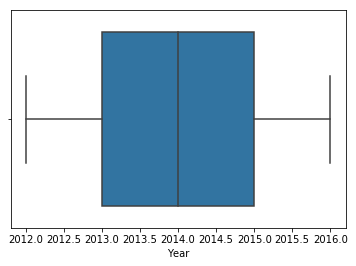

In [3]:
ax = sns.boxplot(x=df['Year'])

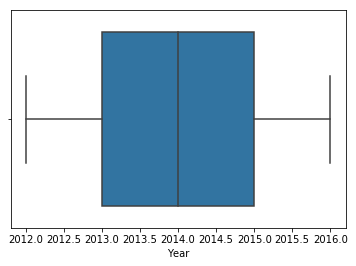

In [4]:
ax = sns.boxplot(x=df['Year'],whis=2)

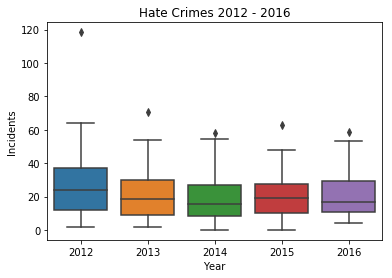

In [18]:
fig = plt.figure()
ax = sns.boxplot(x='Year', y='Incidents', data=df).set_title('Hate Crimes 2012 - 2016')
fig.savefig('Images/hate_crimes_box_plot.png')

In [6]:
# Calculate the population mean for state data in 2015
population1 = df[df["Year"] == 2012]
population1.Incidents.mean()

26.83049271395918

In [7]:
# Calculate the population mean for state data in 2016
population2 = df[df["Year"] == 2014]
population2.Incidents.mean()

18.434398892163262

In [8]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(population1.Incidents, population2.Incidents, equal_var=False)

Ttest_indResult(statistic=2.3203036210887116, pvalue=0.022734055614462057)

In [9]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(population1.Incidents, population2.Incidents, equal_var=True)

Ttest_indResult(statistic=2.3203036210887116, pvalue=0.02244218679244773)

The p value is <.05 therefore the null hypothesis that the means should be the same is not statistically likley.  So we reject the null hypothesis; there is no correlation between the incidents in 2012 and 2014.

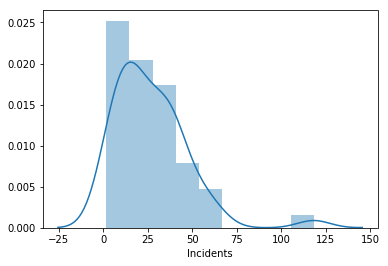

In [10]:
#Chart histogram
fig = plt.figure()
sns.distplot(population1.Incidents)
fig.savefig('Images/ttest_pop1_2012.png')

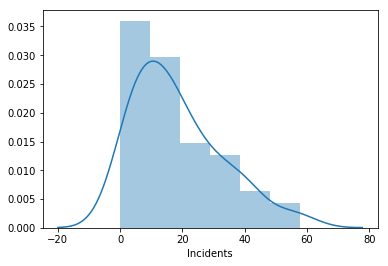

In [11]:
fig = plt.figure()
sns.distplot(population2.Incidents)
fig.savefig('Images/ttest_pop2_2014.png')

In [15]:
# Extract individual groups for ANOVA
group1 = df[df["Year"] == 2012]["Incidents"]
group2 = df[df["Year"] == 2013]["Incidents"]
group3 = df[df["Year"] == 2014]["Incidents"]
group4 = df[df["Year"] == 2015]["Incidents"]
group5 = df[df["Year"] == 2016]["Incidents"]

In [16]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=1.9832562958878082, pvalue=0.09773108154438633)

In [17]:
#P-value >0.05 therefore we fail to reject the null hypothesis.\
#Ha is that the means are significantly different.